In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.ensemble import VotingClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
import seaborn as sns
from sklearn.neural_network import MLPClassifier

In [2]:
def plot_confusion_matrix(y_true, y_pred, labels):
    "this function plots the confusion matrix"
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, fmt='g')  # annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)
    plt.show()

In [3]:
## reading data 
data = pd.read_excel("data/new_data.xlsx")
data.drop(columns=["Unnamed: 0"], inplace=True) ## to remove unnecessary ID column

generated_data = pd.read_excel("data\generated_data.xlsx")
generated_data.drop(columns=["Unnamed: 0"], inplace=True) 

In [4]:
print("original data shape: ", data.shape)
data.head()

original data shape:  (111, 9)


,d_p,d_hole,l_e,f_cg,f_cm,anchore_type,masonry_type,f_max_exp,failure_mode
0,16,80,350,27.3,50.0,4,0,58.0,1
1,16,80,350,27.3,50.0,4,0,40.0,1
2,16,80,350,27.3,50.0,4,0,52.0,1
3,16,80,350,27.3,50.0,4,0,60.0,2
4,16,80,350,27.3,50.0,4,0,64.0,2


In [5]:
## Normalizing generated data

data_x = data.iloc[:,0:-1]
data_y = data.iloc[:,-1]
scaler = StandardScaler()
data_x_nor = scaler.fit_transform(data_x)
data_final = np.column_stack((data_x_nor,data_y))

data_final_df = pd.DataFrame(data=data_final,columns=list(data.columns))
data_final_df.head()

,d_p,d_hole,l_e,f_cg,f_cm,anchore_type,masonry_type,f_max_exp,failure_mode
0,0.411372,2.854512,1.690391,-0.892421,2.714898,0.321232,-0.778486,0.914930,1.0
1,0.411372,2.854512,1.690391,-0.892421,2.714898,0.321232,-0.778486,0.044730,1.0
2,0.411372,2.854512,1.690391,-0.892421,2.714898,0.321232,-0.778486,0.624863,1.0
3,0.411372,2.854512,1.690391,-0.892421,2.714898,0.321232,-0.778486,1.011619,2.0
4,0.411372,2.854512,1.690391,-0.892421,2.714898,0.321232,-0.778486,1.204997,2.0


In [6]:
print("genretaed data shape: ", generated_data.shape)
generated_data.head()

genretaed data shape:  (1000, 9)


,d_p,d_hole,l_e,f_cg,f_cm,anchore_type,masonry_type,f_max_exp,failure_mode
0,0.646669,-0.315394,-0.542088,0.808456,0.661576,1.657302,1.333161,0.735962,0
1,1.019070,0.035179,-0.369328,0.488657,-0.118352,2.574922,1.098196,1.950988,1
2,1.417348,-0.787739,0.344419,1.069244,0.166702,3.432566,1.420440,2.450958,1
3,0.246047,-0.007379,-0.149558,0.151169,0.148199,0.780398,0.295189,0.634450,0
4,0.871234,-0.401319,-0.708741,0.844380,0.391476,2.334630,1.346043,1.589443,1


In [7]:
data_concate = pd.concat([data,generated_data],axis=0)
print("Final data shape: ", data_concate.shape)
data_concate.head()

Final data shape:  (1111, 9)


,d_p,d_hole,l_e,f_cg,f_cm,anchore_type,masonry_type,f_max_exp,failure_mode
0,16.0,80.0,350.0,27.3,50.0,4.0,0.0,58.0,1
1,16.0,80.0,350.0,27.3,50.0,4.0,0.0,40.0,1
2,16.0,80.0,350.0,27.3,50.0,4.0,0.0,52.0,1
3,16.0,80.0,350.0,27.3,50.0,4.0,0.0,60.0,2
4,16.0,80.0,350.0,27.3,50.0,4.0,0.0,64.0,2


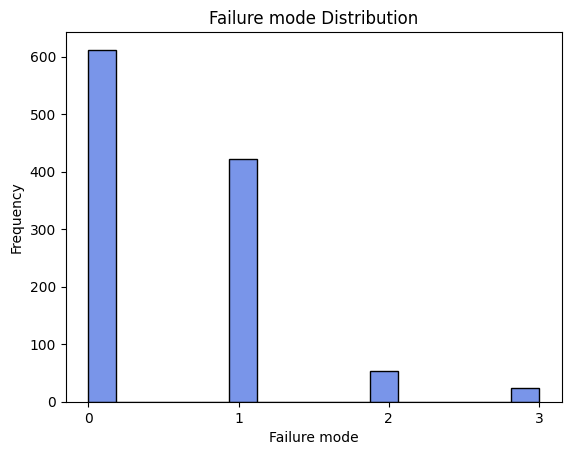

In [8]:
## Checking the frequency for each class (Failure Mode)
sns.histplot(data=data_concate, x="failure_mode", color='royalblue', alpha=0.7)
plt.title("Failure mode Distribution")
plt.xlabel("Failure mode")
plt.xticks([0,1,2,3])
plt.ylabel("Frequency")
plt.show()

In [9]:
X = data_concate.iloc[:,0:-1]
Y = data_concate.iloc[:,-1].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2 ,random_state=42)

print("X_train shape:", x_train.shape)  
print("X_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (888, 8)
X_test shape: (223, 8)
y_train shape: (888,)
y_test shape: (223,)


### ANN model

In [10]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(x_train.shape[1],)),  # Input layer with 128 neurons
    Dense(64, activation='relu'),                                 # Hidden layer with 64 neurons
    Dense(4, activation='softmax')                                 # Output layer (for binary classification)
])

# Compile the model
adam = Adam(learning_rate=0.001) 

model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    epochs=15, batch_size=32,
                    validation_data=(x_test, y_test))

Epoch 1/15
28/28 [==============================] - 4s 20ms/step - loss: 1.6278 - accuracy: 0.5608 - val_loss: 1.2671 - val_accuracy: 0.6457
Epoch 2/15
28/28 [==============================] - 0s 4ms/step - loss: 1.1811 - accuracy: 0.6768 - val_loss: 1.1444 - val_accuracy: 0.6816
Epoch 3/15
28/28 [==============================] - 0s 4ms/step - loss: 0.9390 - accuracy: 0.7095 - val_loss: 0.9962 - val_accuracy: 0.7220
Epoch 4/15
28/28 [==============================] - 0s 4ms/step - loss: 0.8377 - accuracy: 0.7455 - val_loss: 1.0123 - val_accuracy: 0.6861
Epoch 5/15
28/28 [==============================] - 0s 3ms/step - loss: 0.7614 - accuracy: 0.7759 - val_loss: 0.8325 - val_accuracy: 0.7758
Epoch 6/15
28/28 [==============================] - 0s 3ms/step - loss: 0.6758 - accuracy: 0.7928 - val_loss: 0.8226 - val_accuracy: 0.7489
Epoch 7/15
28/28 [==============================] - 0s 3ms/step - loss: 0.6330 - accuracy: 0.8176 - val_loss: 0.9531 - val_accuracy: 0.7534
Epoch 8/15
28/28 [=

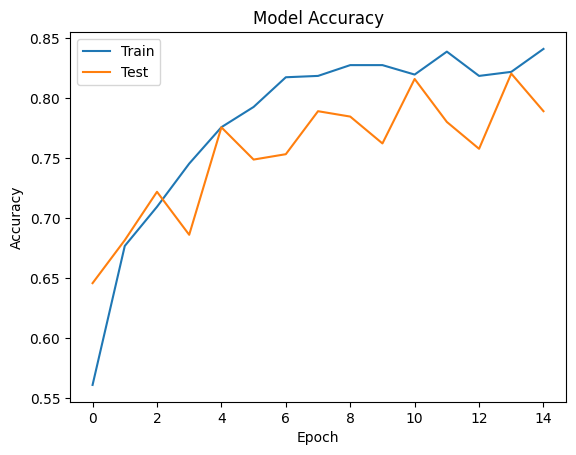

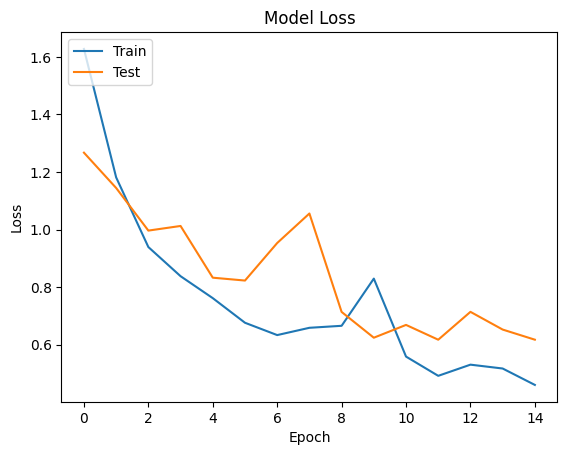

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training and validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

7/7 [==============================] - 0s 2ms/step


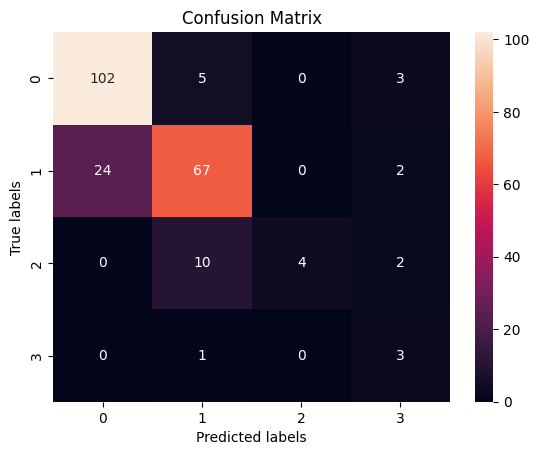

In [12]:
y_pred_nn = model.predict(x_test)
y_pred_nn = np.argmax(y_pred_nn,axis=1)
plot_confusion_matrix(y_test,y_pred_nn,[0,1,2,3])

## SVM

In [13]:
np.random.seed(42)

clfc1 = (SVC(kernel='linear', C=1.0, probability=True,gamma=2.5, random_state=42))
clfc1.fit(x_train, y_train)

y_train_pred_svm1 = clfc1.predict(x_train)
y_pred_svm1 = clfc1.predict(x_test)

print("Test Accuracy: ",accuracy_score(y_test,y_pred_svm1)*100)
print("Train Accuracy: ",accuracy_score(y_train,y_train_pred_svm1)*100)

Test Accuracy:  78.47533632286996
Train Accuracy:  83.22072072072072


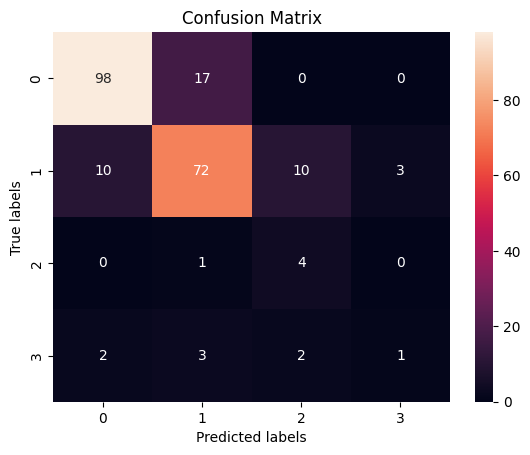

In [14]:
plot_confusion_matrix(y_pred_svm1,y_test,[0,1,2,3])

## Ensemble Models  (SVM + ANN)

In [15]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='auto',probability=True)
lf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(64, 4), random_state=1)
ensemble_model = VotingClassifier([('ann', lf), ('svm', svm_model)], voting='soft')
ensemble_model.fit(x_train, y_train)

VotingClassifier(estimators=[('ann',
                              MLPClassifier(alpha=1e-05,
                                            hidden_layer_sizes=(64, 4),
                                            random_state=1, solver='lbfgs')),
                             ('svm', SVC(gamma='auto', probability=True))],
                 voting='soft')

In [16]:
# Make predictions using the ensemble model
y_pred_ensemble = ensemble_model.predict(x_test)

# Calculate accuracy
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
print("Ensemble Model Accuracy:", accuracy_ensemble)

Ensemble Model Accuracy: 0.8251121076233184
